## AutoEncoder Model - Fraud

In [1]:
%config IPCompleter.greedy=True
#%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
#%load_ext autotime

In [2]:
import pandas as pd
import numpy as np

from keras.models import Model
from keras.layers import Input,Dense

Using TensorFlow backend.


In [3]:
df = pd.read_csv('PCA_standardized.csv')

In [4]:
df.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0,-0.001597,-0.099493,-0.062586,0.055364,0.063748,-0.078686,-0.074330,-0.001329
1,1,3.334907,17.051728,7.791509,1.202956,-5.870208,7.478103,9.150227,-0.355868
2,2,0.008796,0.098246,-0.045428,-0.088565,0.014162,-0.077065,-0.093301,-0.003220
3,3,0.063701,-0.074574,-0.082023,0.040459,0.121016,0.037284,-0.107443,0.016966
4,4,11.512157,-4.585651,-2.718350,5.188391,12.505159,24.322964,-6.417228,5.572582


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.001597,-0.099493,-0.062586,0.055364,0.063748,-0.078686,-0.074330,-0.001329
1,3.334907,17.051728,7.791509,1.202956,-5.870208,7.478103,9.150227,-0.355868
2,0.008796,0.098246,-0.045428,-0.088565,0.014162,-0.077065,-0.093301,-0.003220
3,0.063701,-0.074574,-0.082023,0.040459,0.121016,0.037284,-0.107443,0.016966
4,11.512157,-4.585651,-2.718350,5.188391,12.505159,24.322964,-6.417228,5.572582


In [7]:
df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,1.243260e-16,-8.877057e-17,-4.704204e-16,1.639360e-18,-4.139604e-16,7.154224e-17,4.375312e-16,-5.343976e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.252905e-02,-3.605525e+02,-3.938919e+02,-3.228306e+02,-2.834201e+02,-3.456608e+02,-3.079053e+02,-2.585727e+02
25%,-3.051779e-02,-6.500286e-02,-2.533584e-02,-3.466109e-02,-4.021377e-02,-9.504930e-02,-5.027190e-02,7.351731e-06
50%,-1.462546e-02,-3.161531e-02,-1.181097e-02,-1.827246e-02,-3.184441e-03,-1.062205e-02,-2.186707e-02,2.915357e-02
75%,-3.415713e-03,9.983987e-04,3.363344e-03,5.708233e-03,5.580199e-02,3.436552e-02,1.844435e-02,4.500783e-02
max,6.249536e+02,4.986715e+02,6.061432e+02,3.414084e+02,2.882781e+02,3.646161e+02,4.998757e+02,5.337854e+02


In [8]:
train_df = df.values

In [9]:
input_size = 8
hidden_size = 4
code_size = 2

#autoencoder
input_layer = Input(shape=(input_size,)) 
hidden_1 = Dense(hidden_size, activation='relu')(input_layer)
code = Dense(code_size,activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_layer = Dense(input_size, activation='tanh')(hidden_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [10]:
output=autoencoder.fit(train_df,train_df, epochs = 10)

Epoch 1/10
1070994/1070994 [==============================] - 30s 28us/step - loss: 1.0001 - accuracy: 0.1669
Epoch 2/10
1070994/1070994 [==============================] - 32s 30us/step - loss: 1.0001 - accuracy: 0.1563
Epoch 3/10
1070994/1070994 [==============================] - 33s 30us/step - loss: 1.0001 - accuracy: 0.1661
Epoch 4/10
1070994/1070994 [==============================] - 31s 29us/step - loss: 1.0001 - accuracy: 0.1588
Epoch 5/10
1070994/1070994 [==============================] - 32s 30us/step - loss: 1.0001 - accuracy: 0.1533
Epoch 6/10
1070994/1070994 [==============================] - 32s 30us/step - loss: 1.0001 - accuracy: 0.15170s -
Epoch 7/10
1070994/1070994 [==============================] - 28s 26us/step - loss: 1.0001 - accuracy: 0.15890s - loss: 1.0
Epoch 8/10
1070994/1070994 [==============================] - 28s 26us/step - loss: 1.0001 - accuracy: 0.1573
Epoch 9/10
1070994/1070994 [==============================] - 29s 27us/step - loss: 1.0001 - accuracy:

In [11]:
ans = autoencoder.predict(train_df)

In [12]:
ans_df = pd.DataFrame(ans)

In [13]:
ans_df.head()

,0,1,2,3,4,5,6,7
0,-0.007593,-0.003699,-0.003886,-0.007773,-0.006963,-0.002263,-0.000305,0.006835
1,-0.007593,-0.003699,-0.003886,-0.007773,-0.006963,-0.002263,-0.000305,0.006835
2,-0.007593,-0.003699,-0.003886,-0.007773,-0.006963,-0.002263,-0.000305,0.006835
3,-0.007593,-0.003699,-0.003886,-0.007773,-0.006963,-0.002263,-0.000305,0.006835
4,-0.007593,-0.003699,-0.003886,-0.007773,-0.006963,-0.002263,-0.000305,0.006835


In [14]:
ans_df.to_csv('ans_Reconstructed.csv',index=False)

In [15]:
ans_df.iloc[:,2].mean()

-0.0039032422937452793

In [16]:
pd.DataFrame(train_df).iloc[:,2].mean()

-4.704204152336209e-16

In [17]:
#n=1
manhattan = (ans_df - pd.DataFrame(train_df)).abs()
manhattan_score = manhattan.sum(axis = 1)
manhattan_score

0           0.452950
1          52.260898
2           0.439645
3           0.553331
4          72.832348
             ...    
1070989     0.387855
1070990     0.469622
1070991     0.452685
1070992     0.390062
1070993     0.296586
Length: 1070994, dtype: float64

In [18]:
#n=2
euclidean = (((ans - pd.DataFrame(train_df)).abs())**2).sum(axis=1)
euclidean_score = euclidean**(1/2)
euclidean_score

0           0.181745
1          23.205414
2           0.183590
3           0.219229
4          31.756757
             ...    
1070989     0.159267
1070990     0.187101
1070991     0.183369
1070992     0.159416
1070993     0.120780
Length: 1070994, dtype: float64

In [19]:
manhattan_score=pd.DataFrame(manhattan_score)
euclidean_score=pd.DataFrame(euclidean_score)
fraud_score_AE= pd.concat([manhattan_score,euclidean_score], axis=1)
fraud_score_AE.columns=['Manhattan Score','Euclidean Score']

In [20]:
fraud_score_AE.insert(0,'Record',fraud_score_AE.index+1)

In [21]:
fraud_score_AE.describe()

,Record,Manhattan Score,Euclidean Score
count,1.070994e+06,1.070994e+06,1.070994e+06
mean,5.354975e+05,5.575767e-01,2.373025e-01
std,3.091695e+05,6.665637e+00,2.818499e+00
min,1.000000e+00,1.665865e-02,8.211403e-03
25%,2.677492e+05,1.715604e-01,7.466663e-02
50%,5.354975e+05,2.710587e-01,1.185285e-01
75%,8.032458e+05,5.040402e-01,2.123027e-01
max,1.070994e+06,2.341670e+03,1.024187e+03


In [22]:
fraud_score_AE.to_csv('fraud_score_AE.csv',index=False)

In [23]:
fraud_score_AE.head()

,Record,Manhattan Score,Euclidean Score
0,1,0.452950,0.181745
1,2,52.260898,23.205414
2,3,0.439645,0.183590
3,4,0.553331,0.219229
4,5,72.832348,31.756757


In [24]:
fraud_score_AE['Euclidean Rank'] = fraud_score_AE['Euclidean Score'].rank(ascending=1)
fraud_score_AE['Manhattan Rank'] = fraud_score_AE['Manhattan Score'].rank(ascending=1)
fraud_score_AE.head()

,Record,Manhattan Score,Euclidean Score,Euclidean Rank,Manhattan Rank
0,1,0.452950,0.181745,716092.0,743553.0
1,2,52.260898,23.205414,1070323.0,1070305.0
2,3,0.439645,0.183590,719957.0,730902.0
3,4,0.553331,0.219229,836457.0,910349.0
4,5,72.832348,31.756757,1070394.0,1070395.0


In [25]:
fraud_score_AE.to_csv('fraud_ScoreAndRanks_AE.csv',index=False)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(fraud_score_AE['Manhattan Score'],bins=100, kde=True)
#plt.title('Distribution of :'+col1)
#plt.ylabel('Density of probability', fontsize=12)
#plt.xlabel(col1, fontsize=12)
#plt.savefig("imgs/"+col1+".png")
plt.show()

<Figure size 640x480 with 1 Axes>

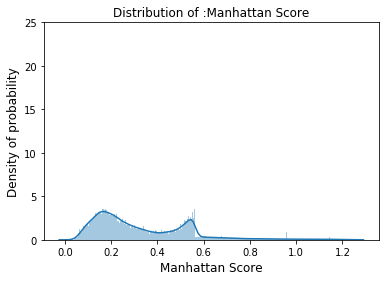

In [27]:
colName='Manhattan Score'
xhigh =1.25
#sns.plt.xlim(0,xhigh)
temp = fraud_score_AE[fraud_score_AE[colName] <= xhigh]
sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
plt.savefig("Manhattan Score.png")
plt.show()

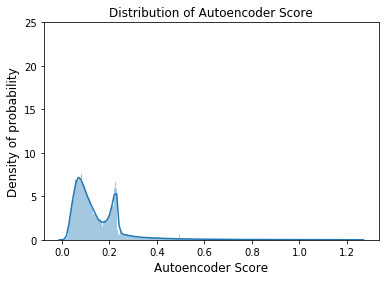

In [32]:
colName='Euclidean Score'
xhigh =1.25
#sns.plt.xlim(0,xhigh)
#temp = fraud_score_AE
temp = fraud_score_AE[fraud_score_AE[colName] <= xhigh]
sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of Autoencoder Score')
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel('Autoencoder Score', fontsize=12)
plt.savefig("Autoencoder Score.png")
plt.show()

In [29]:
bins=10
colName='Euclidean Score'
new_data = pd.qcut(fraud_score_AE[colName], bins, labels=list(range(bins)))

In [30]:
type(new_data)
new_data.value_counts()

6    107101
9    107100
2    107100
0    107100
8    107099
5    107099
4    107099
3    107099
1    107099
7    107098
Name: Euclidean Score, dtype: int64

In [31]:
pd.DataFrame(new_data).head()

,Euclidean Score
0,6
1,9
2,6
3,7
4,9
